<a href="https://colab.research.google.com/github/ErickHen/Knn_Project/blob/main/Knn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
df['target'] = iris.target
df = df.rename(columns={'target':'species'})
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
print(df.isnull().sum(), )
print("----------------------- \n")
print(df.info())
print("----------------------- \n")
print(np.unique(df['species'], return_counts=True))
print("----------------------- \n")
print(df.count())
print("----------------------- \n")
print(df.max())
print("----------------------- \n")
print(df.min())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
----------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
----------------------- 

(array([0, 1, 2]), array([50, 50, 50]))
----------------------- 

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
species              150
dtype: int64
----------------------- 

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)    

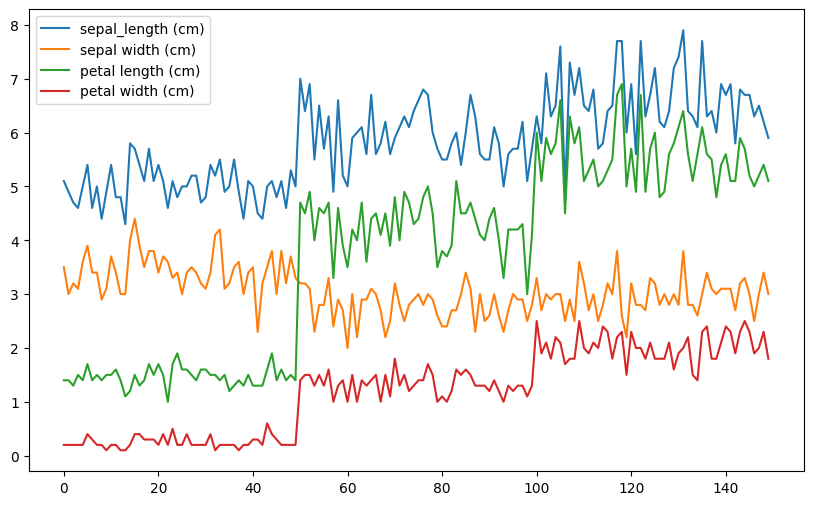

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['sepal length (cm)'], label='sepal_length (cm)')
plt.plot(df['sepal width (cm)'], label='sepal width (cm)')
plt.plot(df['petal length (cm)'], label='petal length (cm)')
plt.plot(df['petal width (cm)'], label='petal width (cm)')
plt.legend()
plt.show()

In [ ]:
x_iris = df.iloc[:, 1:4]
x_iris

,sepal width (cm),petal length (cm),petal width (cm)
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [ ]:
y_iris = df.iloc[:,-1]
y_iris

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.3, random_state=42)
print("tamanho base de treino: ",X_train.shape, y_train.shape)
print("tamanho base de teste: ",X_test.shape, y_test.shape)

tamanho base de treino:  (105, 3) (105,)
tamanho base de teste:  (45, 3) (45,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train, X_test)
X_scaled

array([[-1.46200287, -0.09951105, -0.32339776],
       [-0.50256349,  0.71770262,  0.35303182],
       [ 0.21701605,  0.95119225,  0.75888956],
       [-0.02284379,  0.30909579,  0.2177459 ],
       [ 1.41631528,  1.30142668,  1.70589097],
       [-0.26270364,  0.19235097,  0.08245999],
       [-0.02284379,  1.59328871,  1.16474731],
       [-0.02284379,  0.36746819,  0.35303182],
       [ 1.17645543, -1.44207638, -1.40568508],
       [-0.50256349,  1.65166111,  1.0294614 ],
       [-0.74242333,  0.13397857, -0.32339776],
       [ 0.93659559, -1.44207638, -1.40568508],
       [ 1.17645543, -1.50044878, -1.27039917],
       [ 1.89603497, -1.15021435, -1.13511325],
       [-2.42144225, -0.21625586, -0.32339776],
       [-0.74242333,  0.60095781,  0.75888956],
       [ 0.93659559, -1.15021435, -1.40568508],
       [-0.02284379, -1.32533157, -1.40568508],
       [ 0.69673574, -1.26695916, -0.99982734],
       [-0.74242333,  0.19235097,  0.08245999],
       [ 0.93659559, -1.38370397, -1.405